# 第12回演習「ラベル伝播法」その1

この演習では、ラベル伝播法による半教師あり学習の方法を習得します。<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
<hr />

<img src="https://miro.medium.com/max/700/0*Uw37vrrKzeEWahdB" alt="https://miro.medium.com/max/700/0*Uw37vrrKzeEWahdB" title="https://miro.medium.com/max/700/0*Uw37vrrKzeEWahdB" width="400"></img>

## 1) アヤメのデータセットを読み込む

In [7]:
import seaborn as sns  # データ可視化のためのライブラリ
#sns.get_dataset_names() # 読み込める他のデータセットについても知りたい?
アヤメのデータ = sns.load_dataset("iris")
アヤメのデータ.info() # 特徴量のデータ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2) データ全体を数値として眺める

In [8]:
アヤメのデータ
# sepal_length, sepal_width, petal_length, petal_widthが説明変数。speciesが目的変数

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3) 変数ごとの基本統計量を見る

In [9]:
アヤメのデータ.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4) ある変数に着目し、分布を見る

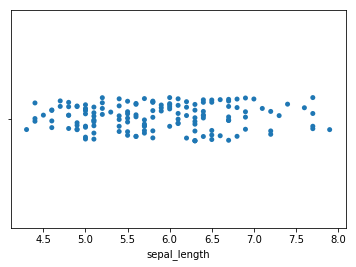

In [10]:
sns.stripplot(x="sepal_length",data=アヤメのデータ)
# y軸はないが、点が重なると見辛いため、seabornが幅をとって表示してくれている。

## 5) 種ごとの分布を見る

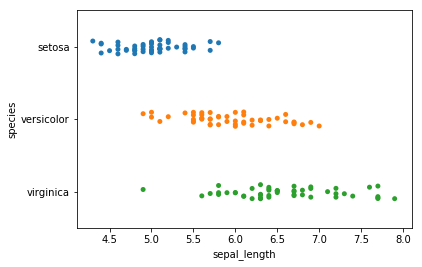

In [11]:
sns.stripplot(x="sepal_length",y="species",data=アヤメのデータ)
# y="species"でy軸に種別（目的変数）を入れた。種別ごとのsepal_length（がくの長さ）の分布が見れる。

## 小出しの任意課題1) 
<span style="background-color:#FFFF99">
sepal_length 以外も分布を見て、異なるラベルのデータがどの程度重なっているかを見ましょう。</span><hr />

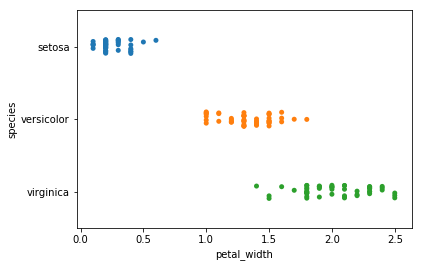

In [15]:
# sepal_length, sepal_width, petal_length, petal_widthが説明変数。speciesが目的変数
# sns.stripplot(x="sepal_width",y="species",data=アヤメのデータ)
# sns.stripplot(x="petal_length",y="species",data=アヤメのデータ)
sns.stripplot(x="petal_width",y="species",data=アヤメのデータ)

## 6) 箱ひげ図で分散を見る

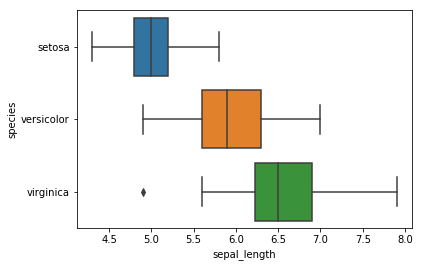

In [16]:
sns.boxplot(x="sepal_length",y="species", data=アヤメのデータ)

## 7) 散布図行列を描く

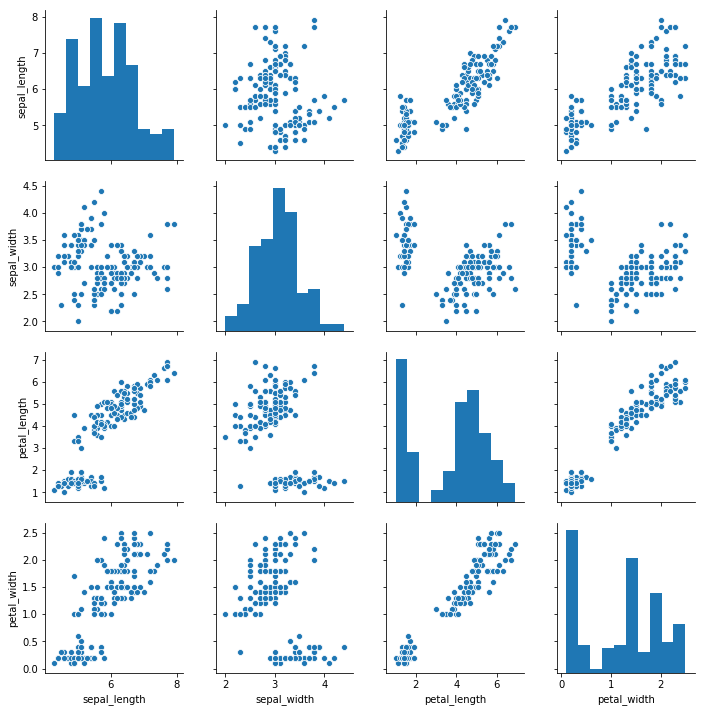

In [17]:
sns.pairplot(アヤメのデータ)
# 大体正の相関があるなどがわかる

## 8) ラベルで色分けされた散布図行列

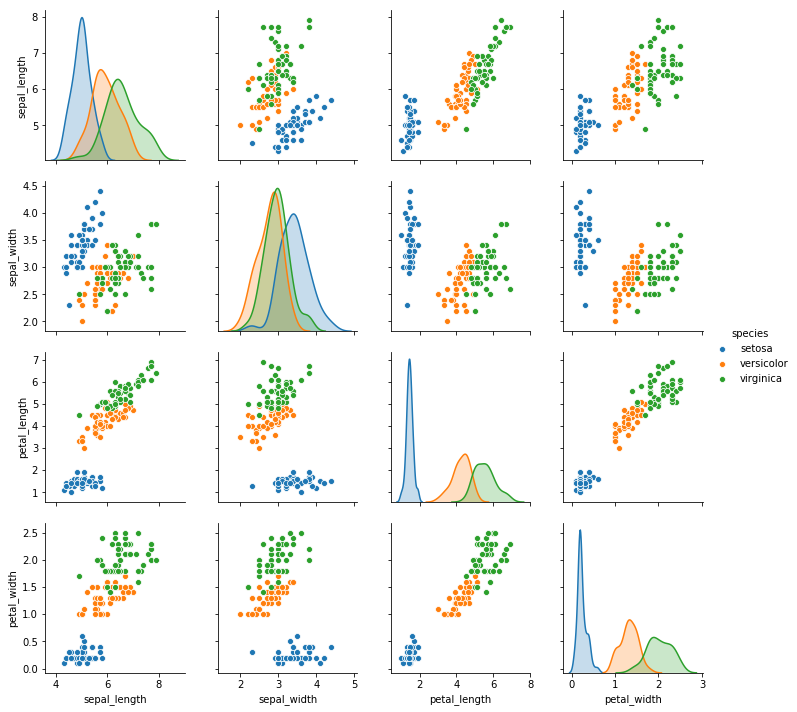

In [18]:
sns.pairplot(アヤメのデータ,hue='species')
# hue='species'をつけると、species（目的変数）で色分けしてくれる

## 9) 説明変数と目的変数を取り出し、加工する

In [19]:
"""
好きなデータを2種類選んで、半教師あり学習に回す
"""
説明変数X=アヤメのデータ.values[:,[0,1,2,3]]
説明変数X=説明変数X[:,:2] # sepal_lengthとsepal_widthを取り出す

y=アヤメのデータ.values[:,4] # 目的変数
y = [s.replace('setosa', '0') for s in y] # setosa を 0 に
y = [s.replace('versicolor', '1') for s in y] # versicolor を 1 に
y = [s.replace('virginica', '2') for s in y] # virginica を 2 に
y = [int(n) for n in y] # 文字を数値に

import numpy as np
目的変数y = np.array(y) # NumPyの配列に

print(説明変数X)
print(目的変数y)

[[5.1 3.5]
 [4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3.0]
 [4.3 3.0]
 [5.8 4.0]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.0 3.0]
 [5.0 3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.0 3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3.0]
 [5.1 3.4]
 [5.0 3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.0 3.5]
 [5.1 3.8]
 [4.8 3.0]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.0 3.3]
 [7.0 3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.0 2.0]
 [5.9 3.0]
 [6.0 2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3.0]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3.0]
 [6.8 2.8]
 [6.7 3.0]
 [6.0 2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.0 2.7]
 [5.4 3.0]
 [6.0 3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3.0]
 [5.5 2.5]
 [5.5 2.6]

## 10) 目的変数の一部を「ラベル無し」にする

In [20]:
ラベル配列=np.copy(目的変数y)
ラベル配列[0:100]= -1
# -1がラベルなしのルール

## 11) 「ラベル無し」を含む散布図を描く

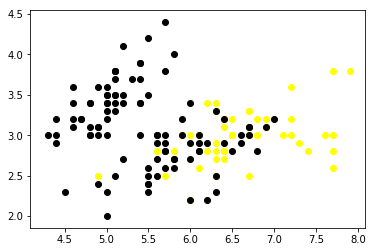

In [21]:
import matplotlib.pyplot as plt
plt.scatter(説明変数X[ラベル配列==0,0],説明変数X[ラベル配列==0,1],c = 'red')
plt.scatter(説明変数X[ラベル配列==1,0],説明変数X[ラベル配列==1,1],c = 'blue')
plt.scatter(説明変数X[ラベル配列==2,0],説明変数X[ラベル配列==2,1],c = 'yellow')
plt.scatter(説明変数X[ラベル配列==-1,0],説明変数X[ラベル配列==-1,1],c = 'black')

## 12) 「ラベル無し」の箇所をランダムに決める

In [22]:
#np.random.choice(range(0,10)) # 0～9 のどれかが返る
#np.random.choice(range(0,10), 5) # 0～9 のどれかが5個返る
#np.random.choice(range(0,10), 5, replace=False) # 0～9 のどれかが、重複なしで5個返る
範囲の下限=0
範囲の上限=目的変数y.size
ランダムにする割合=0.7
ランダムにする個数=int((目的変数y.size)*ランダムにする割合)
ラベル無しのインデックス=np.random.choice(range(範囲の下限,範囲の上限),ランダムにする個数,replace=False)
print(ラベル無しのインデックス)

[  5  72  20  17  54  50 143   0  81 129 123  40   2  96 100  91  94  99
  79  35  71  85 102 135 132  92 109  75  10 112 149 141  82  61  88 147
  23 116  27  78  66  73 115 134 108  49  53   7  95 136  42   9 126  62
  14  97 110 138  64 124 117  70 144 113  21   4  19  89 130  46  29  56
  63  74  98  24  51 140  87 114  77 121  22 122 103  41  44  83 106  84
  18 107  33  55  58  38   8  11  60 131  16  45  76 125 148]


## 小出しの任意課題2) 
<span style="background-color:#FFFF99">
配列「ラベル無しのインデックス」に、本当に重複がないかをチェックするプログラムを書いてください。</span><hr />

In [23]:
# 重複を除去した配列=set(ラベル無しのインデックス) # set で配列の重複が除去される
重複を除去した配列=set(ラベル無しのインデックス)
print(len(ラベル無しのインデックス), len(重複を除去した配列))

105 105


In [ ]:
## 13) ランダムに選ばれた箇所を「ラベル無し」に変更

[  5  72  20  17  54  50 143   0  81 129 123  40   2  96 100  91  94  99
  79  35  71  85 102 135 132  92 109  75  10 112 149 141  82  61  88 147
  23 116  27  78  66  73 115 134 108  49  53   7  95 136  42   9 126  62
  14  97 110 138  64 124 117  70 144 113  21   4  19  89 130  46  29  56
  63  74  98  24  51 140  87 114  77 121  22 122 103  41  44  83 106  84
  18 107  33  55  58  38   8  11  60 131  16  45  76 125 148]
[-1  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0  0 -1  0 -1  0  0  0 -1  0 -1  0  0 -1  0 -1 -1 -1  0 -1 -1 -1  0
  0 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  2 -1 -1  2  2 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  2  2
  2 -1 -1 -1 -1 -1 -1  2  2 -1 -1 -1 -1  2 -1 -1 -1  2 -1  2 -1 -1  2 -1
 -1  2  2 -1 -1 -1]


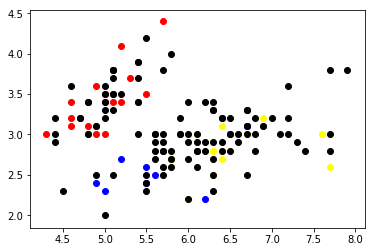

In [25]:
ラベル配列=np.copy(目的変数y)
ラベル配列[ラベル無しのインデックス] = -1
print(ラベル無しのインデックス)
print(ラベル配列)

plt.scatter(説明変数X[ラベル配列==0,0],説明変数X[ラベル配列==0,1],c = 'red')
plt.scatter(説明変数X[ラベル配列==1,0],説明変数X[ラベル配列==1,1],c = 'blue')
plt.scatter(説明変数X[ラベル配列==2,0],説明変数X[ラベル配列==2,1],c = 'yellow')
plt.scatter(説明変数X[ラベル配列==-1,0],説明変数X[ラベル配列==-1,1],c = 'black')

## 14) いよいよ、ラベル伝播法を適用

In [26]:
from sklearn.semi_supervised import LabelPropagation
# LabelPropagationクラスでオブジェクトを作り、.fitで学習させる。

ラベル伝播=LabelPropagation(max_iter=10000) # 最大繰り返し数
ラベル伝播.fit(説明変数X,ラベル配列) # 学習
予測されたy=ラベル伝播.predict(説明変数X)
print(予測されたy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 小出しの任意課題3) 
<span style="background-color:#FFFF99">
ラベル伝播法で得られた「予測されたy」を使って、散布図を描いてください</span><hr />

150
150
[[5.1 3.5]
 [4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3.0]
 [4.3 3.0]
 [5.8 4.0]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.0 3.0]
 [5.0 3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.0 3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3.0]
 [5.1 3.4]
 [5.0 3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.0 3.5]
 [5.1 3.8]
 [4.8 3.0]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.0 3.3]
 [7.0 3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.0 2.0]
 [5.9 3.0]
 [6.0 2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3.0]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3.0]
 [6.8 2.8]
 [6.7 3.0]
 [6.0 2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.0 2.7]
 [5.4 3.0]
 [6.0 3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3.0]
 [5.5 2.5]
 [

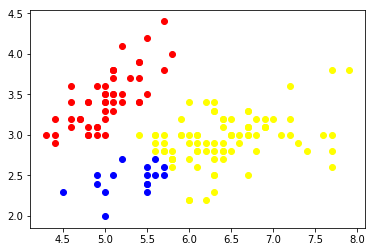

In [37]:
# ヒントは以下です
print(len(説明変数X))
print(len(予測されたy))

print(説明変数X)
print(予測されたy)

plt.figure()
plt.scatter(説明変数X[予測されたy==0,0],説明変数X[予測されたy==0,1],c = 'red')
plt.scatter(説明変数X[予測されたy==1,0],説明変数X[予測されたy==1,1],c = 'blue')
plt.scatter(説明変数X[予測されたy==2,0],説明変数X[予測されたy==2,1],c = 'yellow')
plt.show()

第12回第2章の演習はここまでです。引き続き、第3章の講義を見ましょう。